### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Reading the training and testing dataset files

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')
#rent_df = pd.read_csv('../Data/canada_rent_featEng.csv')

# X_train = pd.read_csv('../Data/X_Training_Alberta.csv')
# X_test = pd.read_csv('../Data/X_Testing_Alberta.csv')

# y_train = pd.read_csv('../Data/y_Training_Alberta.csv')
# y_test = pd.read_csv('../Data/y_Testing_Alberta.csv')

### Features to keep

In [3]:
kbest_15 = ['longitude', 'sq_feet', 'lease_term_6 months', 'type_Basement', 'type_House',
 'type_Room For Rent', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Ontario',
 'province_Saskatchewan', 'city_Toronto', 'city_Edmonton' ,'city_Winnipeg',
 'city_Regina', 'city_West Vancouver']

kbest_20 = ['longitude','beds', 'sq_feet', 'lease_term_6 months',
 'lease_term_Short Term', 'type_Basement', 'type_House', 'type_Room For Rent',
 'province_Manitoba', 'province_Newfoundland and Labrador',
 'province_Ontario', 'province_Saskatchewan', 'city_Calgary', 'city_Toronto',
 'city_Edmonton', 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver',
 'city_Regina', 'city_West Vancouver']

kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']

corBest_30 = ['baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria']

corBest_15 = corBest_30[0:15]
corBest_20 = corBest_30[0:20]


feat2keep = kbest_30

### Keep only selected features from dataset

In [4]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Split dataset into training and testing set

In [5]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Creating pair plot to see correlation and distribution

### Data scaling

In [6]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Train the model on training dataset

In [7]:
# Create instance of model
slr_model = LinearRegression()

# Train model
slr_model.fit(X_train_scaled, y_train)

LinearRegression()

### Forecast on testing dataset

In [8]:
# Obtain predicted y values
y_pred = slr_model.predict(X_test_scaled)
y_pred_train = slr_model.predict(X_train_scaled)

### Evaluate the model

In [9]:
# Training dataset
mae = mean_absolute_error(y_train, y_pred_train)

mse = mean_squared_error(y_train, y_pred_train)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 310
The Mean Square Error = 187229
The Root Mean Square Error = 433
The R2 scores = 1


In [10]:
# Testing dataset
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.2f}\n\
The R2 scores = {r2:.2f}')

The Mean Absolute Error = 307
The Mean Square Error = 182991
The Root Mean Square Error = 428
The R2 scores = 1


In [11]:
np.sqrt(np.mean((y_train - y_pred_train) ** 2))

np.float64(432.69928185287125)

In [12]:
np.sqrt(np.mean((y_test - y_pred) ** 2))

np.float64(427.77470983059527)


| Regression Method   | Predictors  | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ----------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | SelectKBest (15) | 407                | 309293             | 556                   | 1           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 1           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 1           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 1           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 1           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 1           |
| Polynomial          || 2596                | 19449989             | 4410                   | 1           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.


### Look at the coefficients

In [13]:
coeff_df = pd.DataFrame(slr_model.coef_.reshape(-1,1),X_test.columns,columns=['Coefficient'])
coeff_df.transpose()

,latitude,longitude,beds,baths,sq_feet,lease_term_6 months,lease_term_Negotiable,lease_term_Short Term,type_Basement,type_Condo Unit,...,city_Calgary,city_Toronto,city_Edmonton,city_Montréal,city_Ottawa,city_Winnipeg,city_Vancouver,city_Victoria,city_Regina,city_West Vancouver
Coefficient,-134.801522,-61.136219,210.467958,234.57567,-4.999769,0.704074,40.65185,57.947887,-91.407115,37.861877,...,185.905958,217.27859,9.581374,42.784278,33.509858,35.735777,77.066016,13.923911,7.21425,46.538786


### Plot the residuals

Text(0.5, 1.0, 'QQ plot')

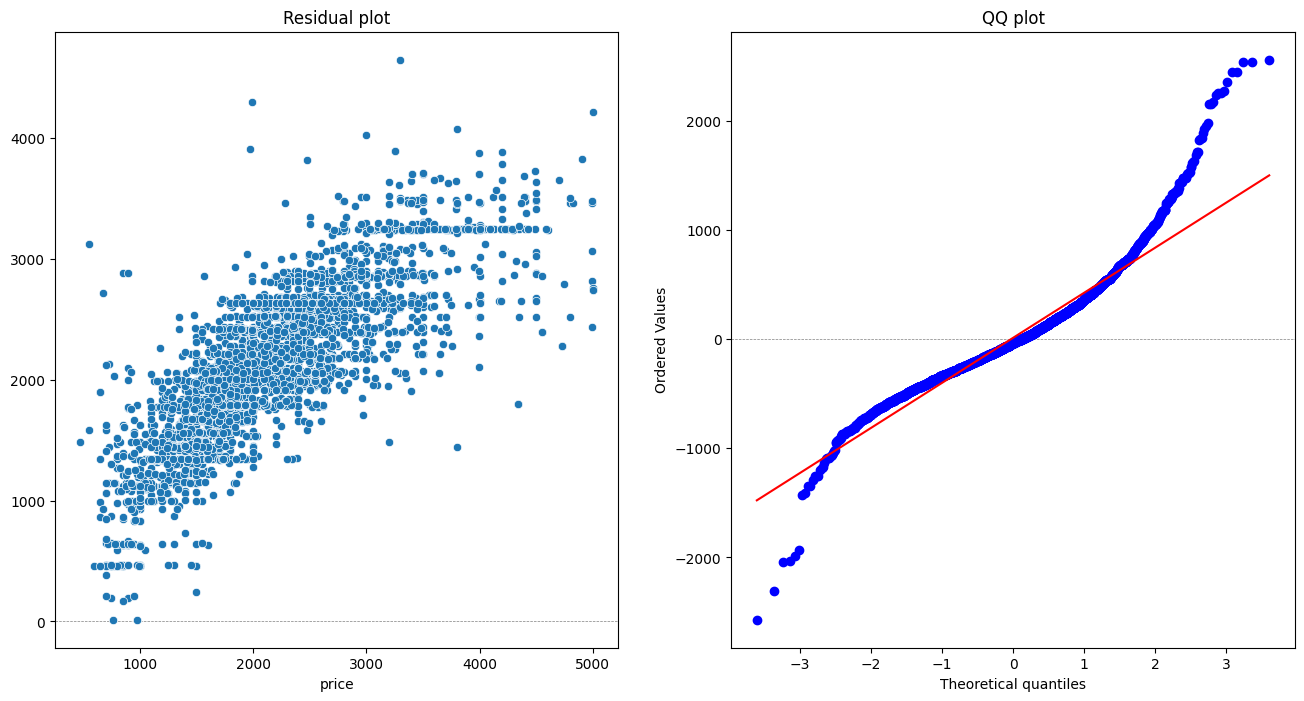

In [14]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

In [15]:
X_test

,latitude,longitude,beds,baths,sq_feet,lease_term_6 months,lease_term_Negotiable,lease_term_Short Term,type_Basement,type_Condo Unit,...,city_Calgary,city_Toronto,city_Edmonton,city_Montréal,city_Ottawa,city_Winnipeg,city_Vancouver,city_Victoria,city_Regina,city_West Vancouver
20220,45.562382,73.615171,3,2.0,1108,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12741,49.880550,97.149497,1,1.0,656,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2055,51.042521,114.092782,1,1.0,723,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10033,50.920408,114.068009,2,1.0,874,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4933,53.622456,113.419092,2,2.0,924,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,43.724705,79.430492,1,1.0,658,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13764,44.904988,79.368796,2,1.0,911,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19476,45.437615,75.783002,1,1.0,605,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,50.978130,114.073360,2,2.0,1042,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
